In [3]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.insert(1, './lib/')

# {Project Title} - Progress Report
### Team Diatonics | CS 418 | Spring 2020

### Team Members
* Leopoldo Gomez (`lgomez36@uic.edu`, `pologomez`)
* Matthew Searcy (`msearc2@uic.edu`, `MatthewSearcy`)
* Matt Rusnaczyk (`mrusna4@uic.edu`, `mrusnaczyk`)
* Faraz Shakir (`fshaki3@uic.edu`, `FShakir`)
* Mahdi Moghaddam (`mmogha2@uic.edu`, `mahdimo5595`)

------

## Changes to Scope of Project
### `TODO`

---

## Data Acquisition and Cleaning
Our analysis is based on two sets of data. The first is the [Classic Rock Song List from FiveThirtyEight](https://github.com/fivethirtyeight/data/blob/master/classic-rock/classic-rock-song-list.csv); the second is the audio features data made available by Spotify through their [RESTful API](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

First, we read in the data from the classic rock songs dataset, then we transform the data into a list consisting of each track and artist concatenated into one string. Converting into this format allows us to more easily search for the tracks in Spotify later on.

In [4]:
# the CSV file containing titles and artists/bands
songs = pd.read_csv("data/classic-rock-song-list.csv")

# extracting title and names of the artists/bands
titles = songs['Song Clean'].tolist()
artists = songs['ARTIST CLEAN'].tolist()

# creating a list of titles+aritsts to be queried
title_artist = []
for i in range(0, len(titles)):
    title_artist.append(titles[i] + " " + artists[i])

Next, we take the title/artist strings we generated earlier, and retrieve the corresponding Spotify resource URLs for each:

In [15]:
import spotify

# getting the urls of each song
urls = spotify.get_spotify_resource_url(title_artist)

retrying after...2secs
retrying after...2secs
retrying after...2secs
retrying after...4secs
retrying after...4secs
retrying after...5secs
retrying after...4secs
retrying after...4secs
retrying after...4secs
retrying after...1secs
retrying after...1secs
retrying after...1secs
retrying after...3secs
retrying after...3secs
retrying after...1secs
retrying after...3secs
retrying after...2secs


Then, we use the Spotify API to retrieve the audio features for each of the songs in the list, and add the track name and artist back in:

In [18]:
# gets the audio features of each song
dataframe = audio_features(urls, spotify.get_spotify_client())
dataframe['artist'] = songs['ARTIST CLEAN']
dataframe['title'] = songs['Song Clean']

And this is the resulting dataset:

In [19]:
dataframe.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,title
0,0.425,0.681,1,-8.604,0.0316,0.02290,0.000219,0.0543,0.933,131.011,.38 Special,Caught Up in You
1,0.418,0.775,4,-9.591,0.0333,0.05310,0.001250,0.0932,0.845,123.524,.38 Special,Fantasy Girl
2,0.567,0.559,9,-10.175,0.0288,0.00888,0.001310,0.0764,0.898,127.227,.38 Special,Hold On Loosely
3,0.659,0.505,0,-12.773,0.0302,0.05300,0.000000,0.0544,0.879,128.295,.38 Special,Rockin' Into the Night
4,0.646,0.426,0,-10.629,0.0480,0.08580,0.072700,0.0746,0.462,124.794,10cc,Art For Arts Sake


---

## Exploratory Data Analysis

### `TODO`

---

## Machine Learning Analysis
### `TODO`

In [21]:
# scalling loudness key and tempo so the values of all features are between 0 and 1

scaler = MinMaxScaler()

scaler.fit(dataframe[['loudness']])
dataframe[['loudness']] = scaler.transform(dataframe[['loudness']])

scaler.fit(dataframe[['key']])
dataframe[['key']] = scaler.transform(dataframe[['key']])

scaler.fit(dataframe[['tempo']])
dataframe[['tempo']] = scaler.transform(dataframe[['tempo']])

In [22]:
dataframe.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,title
0,0.425,0.681,0.090909,0.675499,0.0316,0.02290,0.000219,0.0543,0.933,0.606763,.38 Special,Caught Up in You
1,0.418,0.775,0.363636,0.630254,0.0333,0.05310,0.001250,0.0932,0.845,0.572088,.38 Special,Fantasy Girl
2,0.567,0.559,0.818182,0.603484,0.0288,0.00888,0.001310,0.0764,0.898,0.589238,.38 Special,Hold On Loosely
3,0.659,0.505,0.000000,0.484391,0.0302,0.05300,0.000000,0.0544,0.879,0.594184,.38 Special,Rockin' Into the Night
4,0.646,0.426,0.000000,0.582672,0.0480,0.08580,0.072700,0.0746,0.462,0.577969,10cc,Art For Arts Sake


In [23]:
# k-means clustering algorithm with 50 clusters

km = KMeans(n_clusters=50)
prediction = km.fit_predict(dataframe[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
                                      'instrumentalness', 'liveness', 'valence', 'tempo']])
dataframe['cluster'] = prediction

In [24]:
dataframe.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,title,cluster
0,0.425,0.681,0.090909,0.675499,0.0316,0.02290,0.000219,0.0543,0.933,0.606763,.38 Special,Caught Up in You,18
1,0.418,0.775,0.363636,0.630254,0.0333,0.05310,0.001250,0.0932,0.845,0.572088,.38 Special,Fantasy Girl,17
2,0.567,0.559,0.818182,0.603484,0.0288,0.00888,0.001310,0.0764,0.898,0.589238,.38 Special,Hold On Loosely,21
3,0.659,0.505,0.000000,0.484391,0.0302,0.05300,0.000000,0.0544,0.879,0.594184,.38 Special,Rockin' Into the Night,44
4,0.646,0.426,0.000000,0.582672,0.0480,0.08580,0.072700,0.0746,0.462,0.577969,10cc,Art For Arts Sake,29


In [25]:
# returns a dataframe of songs similar a spicific song in dataframe

def recommend(song, dataframe):
    try:
        clt = dataframe[dataframe.title == song].cluster.values[0]
        df = dataframe[dataframe.cluster == clt][['title', 'artist']].reset_index().drop(columns=['index'])
        return df
    except:
        print('The requested song is not in dataframe.')

In [26]:
recommend('Back In Black', dataframe).head()

,title,artist
0,Back In Black,AC/DC
1,Night Prowler,AC/DC
2,"Baby, Please Don't Go",Aerosmith
3,Seasons of Wither,Aerosmith
4,Toys in the Attic,Aerosmith


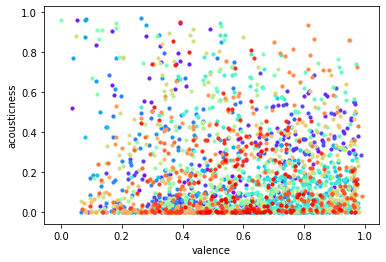

In [27]:
plt.xlabel('valence')
plt.ylabel('acousticness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    colors = cm.rainbow(np.linspace(0, 1, 50))
    plt.scatter(df.valence, df.acousticness, color=colors[j], s=10)

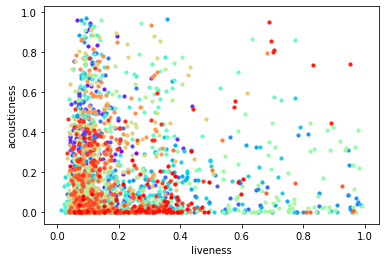

In [28]:
plt.xlabel('liveness')
plt.ylabel('acousticness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    colors = cm.rainbow(np.linspace(0, 1, 50))
    plt.scatter(df.liveness, df.acousticness, color=colors[j], s=10)

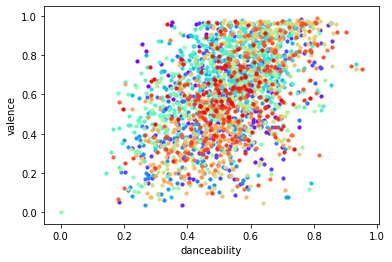

In [29]:
plt.xlabel('danceability')
plt.ylabel('valence')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    colors = cm.rainbow(np.linspace(0, 1, 50))
    plt.scatter(df.danceability, df.valence, color=colors[j], s=10)

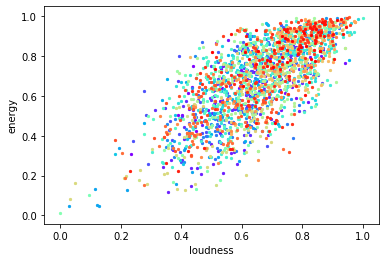

In [30]:
plt.xlabel('loudness')
plt.ylabel('energy')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    colors = cm.rainbow(np.linspace(0, 1, 50))
    plt.scatter(df.loudness, df.energy, color=colors[j], s=5)

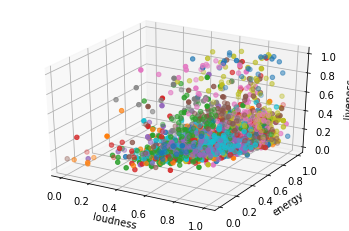

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('loudness')
ax.set_ylabel('energy')
ax.set_zlabel('liveness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    ax.scatter(df.loudness, df.energy, df.liveness )


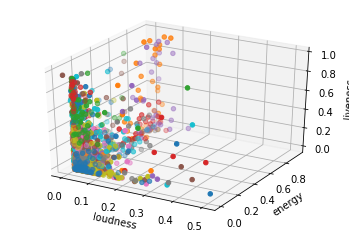

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('loudness')
ax.set_ylabel('energy')
ax.set_zlabel('liveness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    ax.scatter(df.speechiness, df.instrumentalness, df.acousticness)

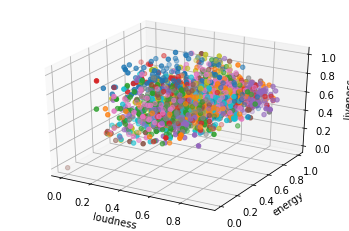

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('loudness')
ax.set_ylabel('energy')
ax.set_zlabel('liveness')
for j in range(0,50):
    df = dataframe[dataframe.cluster == j]
    ax.scatter(df.danceability, df.valence, df.tempo)

---

## Reflection

For reference
- What is hardest part of the project that you’ve encountered so far?
- What are your initial insights?
- Are there any concrete results you can show at this point? If not, why not?
- Going forward, what are the current biggest problems you’re facing?

### `TODO`

---